In [1]:
import numpy as np
# https://stackoverflow.com/exit
questions/4383571/importing-files-from-different-folder
import sys
sys.path.insert(1, '../python_scripts/')
from plot import *
from wavenumbers import *
from wavenumber_distances import *

In [2]:
# Data
x_diffraction_pt = np.array([5000, -3000]) # difraction point, fixed throughout the notebook
N = 31 # number of sources and receivers
c0 = 2*np.pi # velocity of the medium
f0 = 1 # # time frequency

# reference sources and receivers
start = 0
stop = 10000

# Distance of a wavenumber point to its nearest neighbour

We are interested here in the distance of a point in the wavenumbers cloud to its nearest neighbour. 

## 1 - Analytic expression of the distances to the adjacent neighbours in the index space

At first we consider the distance of a point $k$ to its adjacent neighbour in the index space. Let us suppose that $k$ is associated to the source $s$ and receiver $r$ (thus is obtained through the unit vectors $p_s$ and $p_r$ or the corresponding angles $\phi_s$ and $\phi_r$).

### 1.1 - Distance expressed as a function of an angle increment $a$

Let $k_{s + 1}$ denotes the wavenumber obtained from the angles $\phi_{s + 1} = \phi_s + a$ and $\phi_r$, where $a$ is any real increment. We would have, thanks to trigonometric formulae:

$$ k - k_{s + 1} = k_0 \begin{bmatrix} \sin \phi_s - \sin \left( \phi_s + a \right) \\ - \left[ \cos \phi_s - \cos \left( \phi_s + a \right) \right] \end{bmatrix}
= 2 k_0 \begin{bmatrix} \sin ( -\frac{a}{2} ) \cos \left( \phi_s  + \frac{a}{2} \right) \\ \sin \left( \phi_s  + \frac{a}{2} \right) \sin ( -\frac{a}{2} )  \end{bmatrix} 
= - 2 k_0 \sin ( \frac{a}{2} ) \begin{bmatrix} \cos \left( \phi_s  + \frac{a}{2} \right) \\ \sin \left( \phi_s  + \frac{a}{2} \right) \end{bmatrix} \, ,$$

so the distance between $k$ and the incremented wavenumber $k_{s + 1}$ is

$$ \| k - k_{s + 1} \| = 2 k_0 \sin( \frac{|a|}{2} ) \, .$$

### 1.2 - Distance expressed as a function of the positionning increment $h$

This time let $k_{s + 1}$ denote the wavnumber obtained from $k_{s + 1} = p_{s + 1} + p_r$ where 

$$ p_{s + 1} = \begin{pmatrix} - ( x_s + h ) \\ y \end{pmatrix} \, .$$

We would have

$$ k - k_{s + 1} = k_0 \begin{bmatrix} \frac{- x_s}{\sqrt{ x_s^2 + y^2}} + \frac{x_s + h}{\sqrt{ (x_s + h)^2 + y^2}} \\
\left( \frac{1}{\sqrt{ x_s^2 + y^2}} - \frac{1}{\sqrt{ (x_s + h)^2 + y^2}} \right) y
\end{bmatrix}
$$

and thus 

$$ \| k - k_{s + 1} \|^2 = k_0^2 \left( \frac{x_s^2}{x_s^2 + y^2} + \frac{( x_s + h )^2}{( x_s + h )^2 + y^2} - 2 \frac{x_s(x_s + h)}{\sqrt{x_s^2 + y^2}\sqrt{( x_s + h) ^2 + y^2}} + \frac{y^2}{x_s^2 + y^2} + \frac{y^2}{( x_s + h )^2 + y^2} - 2 \frac{y^2}{\sqrt{x_s^2 + y^2}\sqrt{( x_s + h) ^2 + y^2}} \right) \, .$$

We get after simplification

$$ \| k - k_{s + 1} \|^2 = 2 k_0^2 \left( 1 - \frac{x_s (x_s + h) + y^2}{\sqrt{x_s^2 + y^2}\sqrt{( x_s + h) ^2 + y^2}} \right) \, .$$

We can see that 

$$ \frac{x_s (x_s + h) + y^2}{\sqrt{x_s^2 + y^2}\sqrt{( x_s + h) ^2 + y^2}} = \frac{<p_s, p_{s + 1}>}{\| p_s \| \| p_{s + 1} \|} = \cos a \, ,$$

where $a$ denotes the angle between $p_s$ and $p_{s + 1}$ and can be interpreted as the increment $a = | \phi_{s + 1} - \phi_s |$. 

Consequently

$$ \| k - k_{s + 1} \| = \sqrt{2} k_0 \sqrt{ 1 - \cos a} = \sqrt{2} k_0 \sqrt{ 1 - \left( 1 - 2 \sin^2 \frac{a}{2} \right) } = \sqrt{2} k_0 \sqrt{ 2 \sin^2 \frac{a}{2}  }\, .$$

Finally 

$$ \| k - k_{s + 1} \| = 2 k_0 \sin \frac{a}{2} \, .$$

We can see that we obtain the same formula as before. 

### 1.3 - Distance expressed as a function of two angular increments $a_s$ and $a_r$ (Most general formula)

Let $k_{s + 1, r + 1}$ denote the wavenumber obtained from the angles $\phi_{s + 1} = \phi_s + a_s$ and $\phi_{r + 1} = \phi_r + a_r$. We would have:

$$ k - k_{s + 1, r + 1} 
= - 2 k_0 \sin ( \frac{a_s}{2} ) \begin{bmatrix} \cos \left( \phi_s  + \frac{a_s}{2} \right) \\ \sin \left( \phi_s  + \frac{a_s}{2} \right) \end{bmatrix} - 2 k_0 \sin ( \frac{a_r}{2} ) \begin{bmatrix} \cos \left( \phi_r  + \frac{a_r}{2} \right) \\ \sin \left( \phi_r  + \frac{a_r}{2} \right) \end{bmatrix} \, ,$$

and the distance between $k$ and the incremented wavenumber $k_{s + 1, r + 1}$ is

$$ \| k - k_{s + 1, r + 1} \| = 2 k_0 \sqrt{ \sin^2( \frac{a_s}{2} ) + \sin^2( \frac{a_r}{2} ) + 2 \sin( \frac{a_s}{2} ) \sin( \frac{a_r}{2} ) \cos \left[\phi_s - \phi_r + \frac{1}{2} ( a_s - a_r ) \right] } \, .$$

If we consider a regular discretization of the angles space (i.e. $a_s = a_r = a$) we would have:

$$ \| k - k_{s + 1, r + 1} \| = 2 \sqrt{2} k_0 \sin( \frac{|a|}{2} ) \sqrt{ 1 - \cos \left[ \phi_s - \phi_r \right] } = 2 \sqrt{2} k_0 \sin( \frac{|a|}{2} ) \sin \left| \phi_s - \phi_r \right| \, .$$

## 2 - Distances to the nearest neighbour

We compute for each point in the cloud the distance to its nearest neighbour; we plot the histogram of the distances and some statistics. 

To find the nearest neighbour of a point we use a [kd-tree](https://en.wikipedia.org/wiki/K-d_tree) representation of the points. After that we compare that nearest neighbour to the adjacent neighbours in the index space.

### 2.1 - Sources and receivers placed in the same positions

#### 2.1.1 - Reference cloud: regular positionning of the sources and receivers 

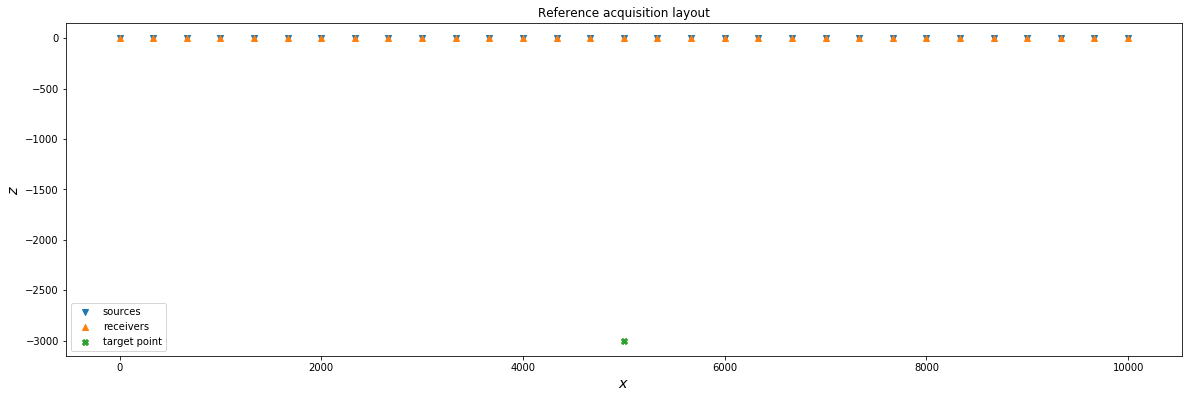

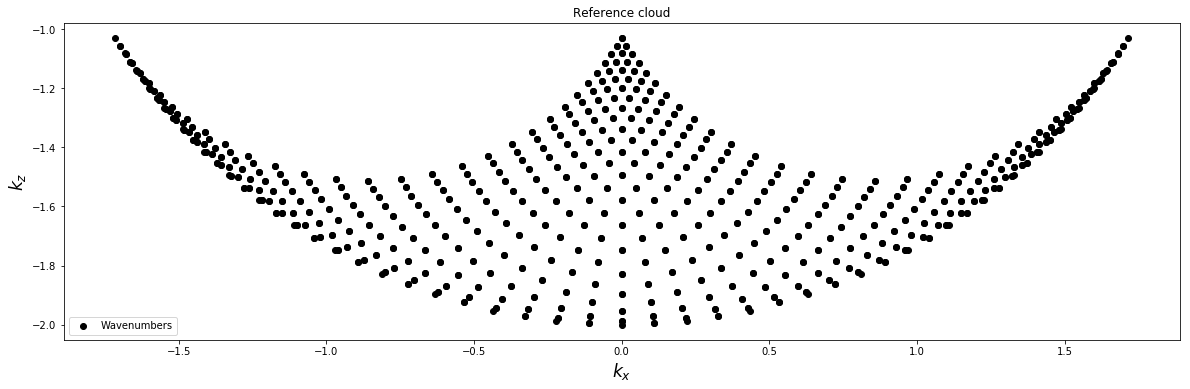

In [3]:
# reference sources and receivers
S_ref = np.array([np.linspace(start = start, stop = stop, num = N, dtype = float), np.zeros(N)]).T # localizations of the sources
R_ref = np.array([np.linspace(start = start, stop = stop, num = N, dtype = float), np.zeros(N)]).T # localizations of the receivers

# We compute the maximum angle \phi_max that \phi_s and \phi_r can take; will be useful later to 
# generate regularly distributed angles 
PhiS_ref, PhiR_ref = layout2angles(x_diffraction_pt, S_ref, R_ref)
abs_value_all_angles = np.abs(np.concatenate((PhiS_ref, PhiR_ref)))
phi_max = np.amax( abs_value_all_angles )

# We compute the wavenumbers components of reference
plot_acquisition_layout(S_ref, R_ref, x_diffraction_pt, title = "Reference acquisition layout")
K_ref = wavenumbers_positions_formula(x_diffraction_pt, S_ref, R_ref, c0, f0)
plot_wavenumber_cloud(K_ref, labels = "Wavenumbers", title = "Reference cloud", colors = 'k')

Statistics about the distances:
----------------
Number of points with the duplicates:  961
Number of points after supression of the duplicates:  496
Minimum distance:  0.0034550267940401283
Maximum distance:  0.07930854499743889
Mean distance:  0.033832062023556125
variance of the distances:  0.0002866531568455894


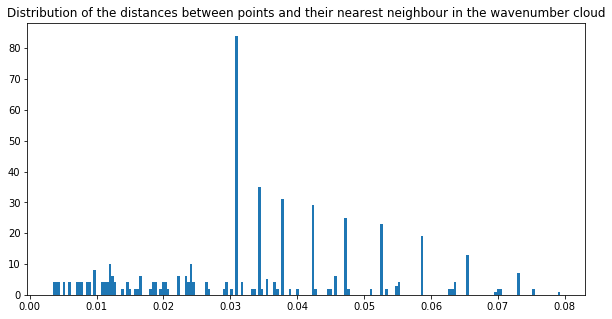

In [4]:
# K_unique : wavenumber cloud with no duplicates
# distances_unique : the smallest distance to another wavenumber point for each point of K_unique
# neighbours_unique : the indices in K_unique that correspond to the closest neighbours to points of K_unique
# distances_full : the smallest distance to another wavenumber point for each point of K
# neighbours_full : the indices in K_unique that correspond to the closest neighbours to points of K
K_unique_ref, distances_unique_ref, neighbours_unique_ref, distances_full_ref, neighbours_full_ref = find_nearest_neighbours(K_ref)
statistics_distances(K_ref, distances_unique_ref)
histogram_distances(K_ref, distances_unique_ref)

We take the difference between the found distance to the nearest neighbour and the distances to the adjacent points; we find that in some case **the nearest neighbour doesn't belong to the points that are adjacent in the index space**.

In [5]:
PhiS_ref, PhiR_ref = layout2angles(x_diffraction_pt, S_ref, R_ref)

# From angles in PhiS and PhiR we generate a cloud of points and for each point we compute its minimum distance
# to another point of the cloud (we avoid the points that are similar) and we return the lists (or arrays):
# min_distances_formula : minimum distances obtained using the angular increment formula 
# min_distances_euclidean : minimum distances obtained using the euclidean distance
# neighbours_indices : indices of the neighbours associated to each point in the cloud
min_distances_formula_ref, min_distances_euclidean_ref, neighbours_indices_ref = min_indices_distance(PhiS_ref, PhiR_ref, c0, f0)

diff_array_ref = np.around(min_distances_formula_ref - distances_full_ref, decimals = 6)
print("Maximum absolute value of the difference between the minimum distance found (distance to the nearest neighbour) and the minimum distance of the neighbouring points in indices: ", np.amax( diff_array_ref ))

non_zero_ref = []
for value in diff_array_ref:
    if np.abs(value) != 0.:
        non_zero_ref.append(value)
print("Number of values that are not null: ", len(non_zero_ref))

Maximum absolute value of the difference between the minimum distance found (distance to the nearest neighbour) and the minimum distance of the neighbouring points in indices:  0.014736
Number of values that are not null:  86


Let us take some examples and print a point and its nearest neighbour, along its adjecent points:

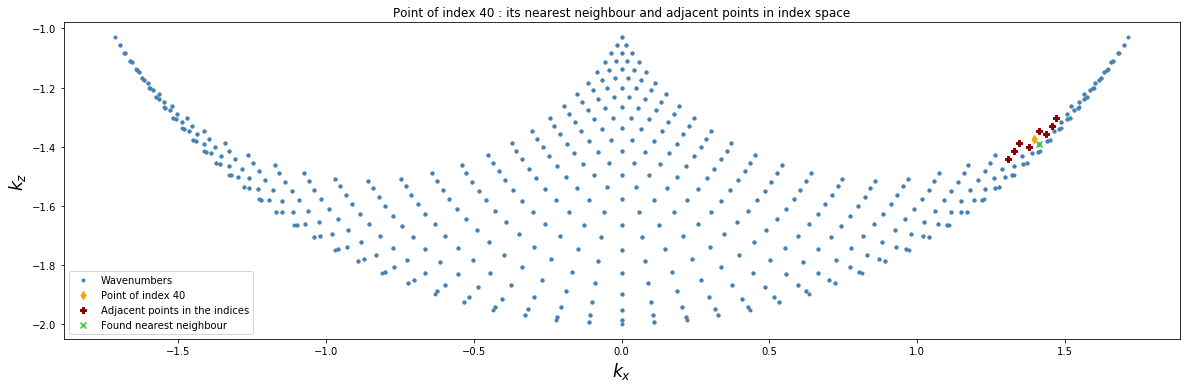

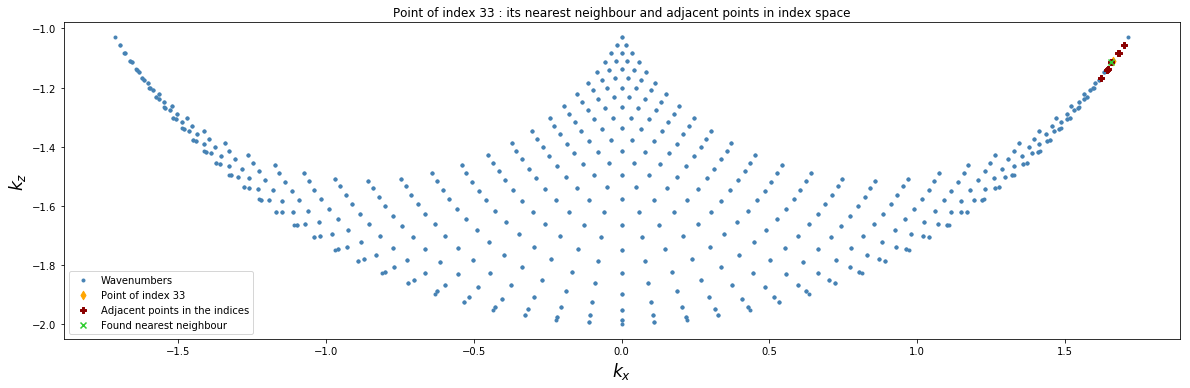

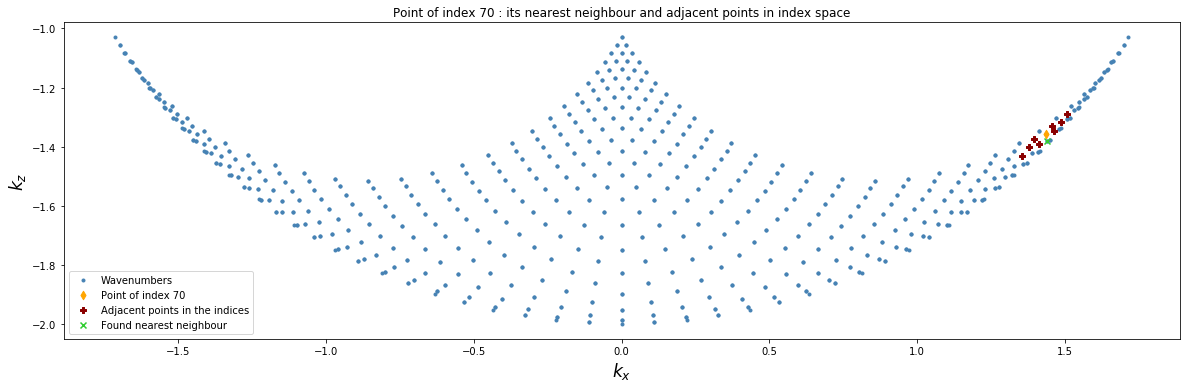

In [6]:
# Argument
i = 40
plot_nearest_neighbours_pt_in_cloud(K_ref, K_unique_ref, i, neighbours_full_ref, neighbours_indices_ref)

# Argument
i = 33
plot_nearest_neighbours_pt_in_cloud(K_ref, K_unique_ref, i, neighbours_full_ref, neighbours_indices_ref)

# Argument
i = 70
plot_nearest_neighbours_pt_in_cloud(K_ref, K_unique_ref, i, neighbours_full_ref, neighbours_indices_ref)

#### 2.3.2 - Regular $\phi_s$ and $\phi_r$ angles

What happens when we generate a wavenumber cloud with regularly sampled angles $\phi_s$'s and $\phi_r$'s?

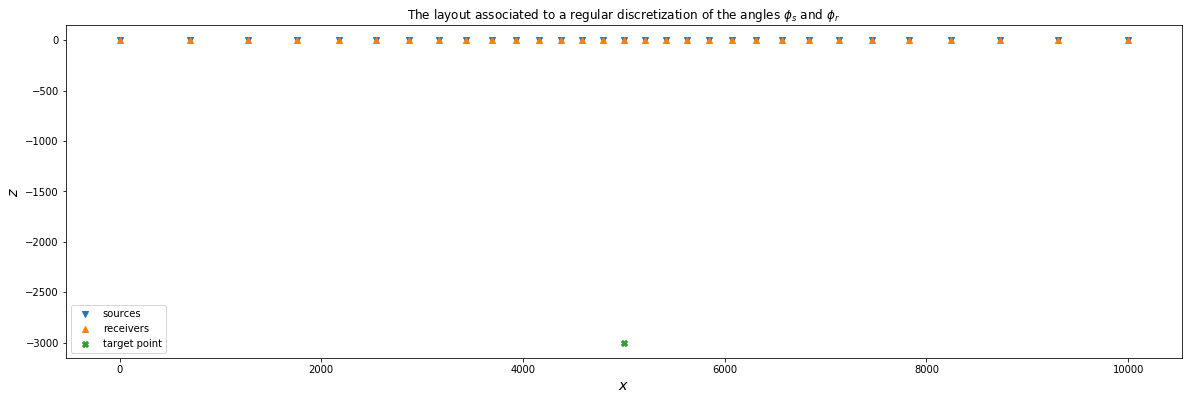

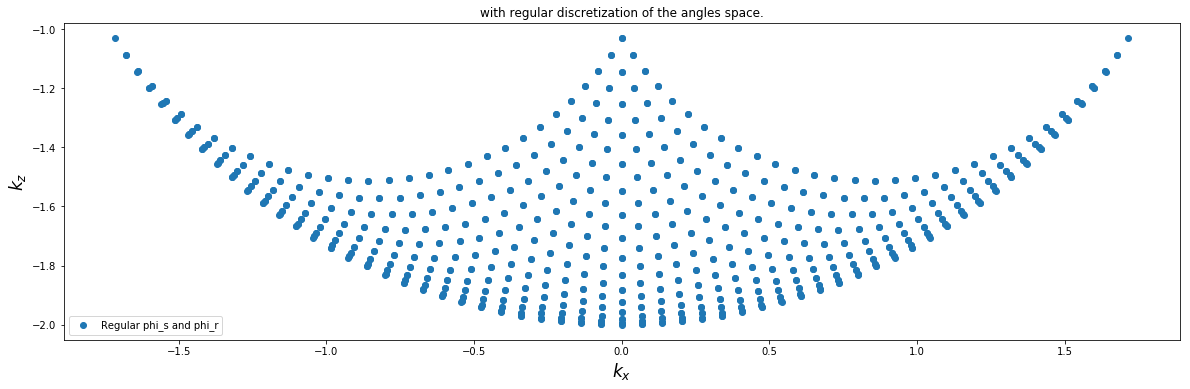

In [7]:
# A regular discretization of the angles \phi_s and \phi_r
PhiS_regular = np.linspace(start = -phi_max, stop = phi_max, num = N)
PhiR_regular = np.linspace(start = -phi_max, stop = phi_max, num = N)

S_regular, R_regular = angles2layout(PhiS_regular, PhiR_regular, x_diffraction_pt)
plot_acquisition_layout(S_regular, R_regular, x_diffraction_pt, title = "The layout associated to a regular discretization of the angles $\phi_s$ and $\phi_r$")

# We compute the wavenumbers components of reference
K_regular = wavenumbers_positions_formula(x_diffraction_pt, S_regular, R_regular, c0, f0)
plot_wavenumber_cloud(K_regular, "Regular phi_s and phi_r", title = "with regular discretization of the angles space.", color = 'steelblue')

Statistics about the distances:
----------------
Number of points with the duplicates:  961
Number of points after supression of the duplicates:  496
Minimum distance:  0.004716706688074825
Maximum distance:  0.06867828396280104
Mean distance:  0.037877235985923866
variance of the distances:  0.0005799537699003622


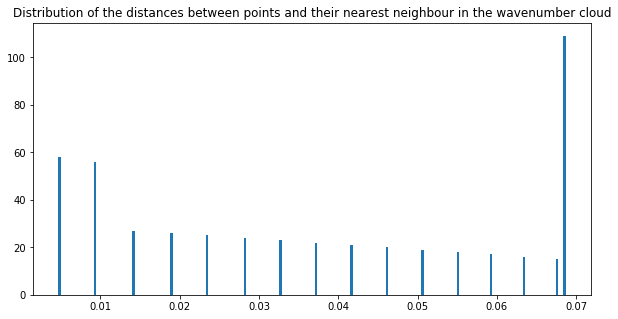

In [8]:
# K_unique : wavenumber cloud with no duplicates
# distances_unique : the smallest distance to another wavenumber point for each point of K_unique
# neighbours_unique : the indices in K_unique that correspond to the closest neighbours to points of K_unique
# distances_full : the smallest distance to another wavenumber point for each point of K
# neighbours_full : the indices in K_unique that correspond to the closest neighbours to points of K
K_unique_regular, distances_unique_regular, neighbours_regular, distances_full_regular, neighbours_full_regular = find_nearest_neighbours(K_regular)
statistics_distances(K_regular, distances_unique_regular)
histogram_distances(K_regular, distances_unique_regular)

In [9]:
PhiS_regular, PhiR_regular = layout2angles(x_diffraction_pt, S_regular, R_regular)

# From angles in PhiS and PhiR we generate a cloud of points and for each point we compute its minimum distance
# to another point of the cloud (we avoid the points that are similar) and we return the lists (or arrays):
# min_distances_formula : minimum distances obtained using the angular increment formula 
# min_distances_euclidean : minimum distances obtained using the euclidean distance
# neighbours_indices : indices of the neighbours associated to each point in the cloud
min_distances_formula_regular, min_distances_euclidean_regular, neighbours_indices_regular = min_indices_distance(PhiS_regular, PhiR_regular, c0, f0)
print("Difference between the minimum distance found (distance to the nearest neighbour) and the minimum distance of the adjacent points")

diff_array_regular = np.around(min_distances_formula_regular - distances_full_regular, decimals = 6)
print("Maximum absolute value of the difference between the minimum distance found (distance to the nearest neighbour) and the minimum distance of the neighbouring points in indices: ", np.amax( diff_array_regular ))

non_zero_regular = []
for value in diff_array_regular:
    if np.abs(value) != 0.:
        non_zero_regular.append(value)
print("Number of values that are not null: ", len(non_zero_regular))

Difference between the minimum distance found (distance to the nearest neighbour) and the minimum distance of the adjacent points
Maximum absolute value of the difference between the minimum distance found (distance to the nearest neighbour) and the minimum distance of the neighbouring points in indices:  0.035972
Number of values that are not null:  6


**Remark** : We notice that in the case of regularly spaced angles the nearest neighbours correspond mostly to the neighbours in indices.

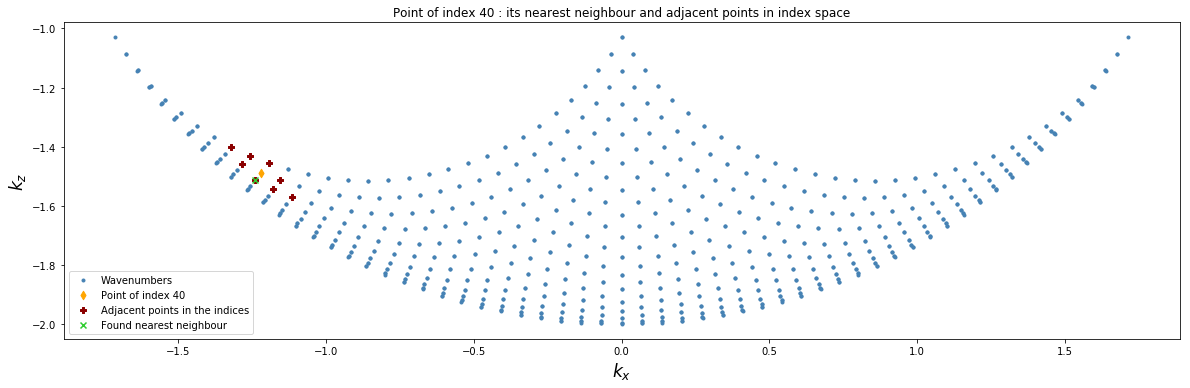

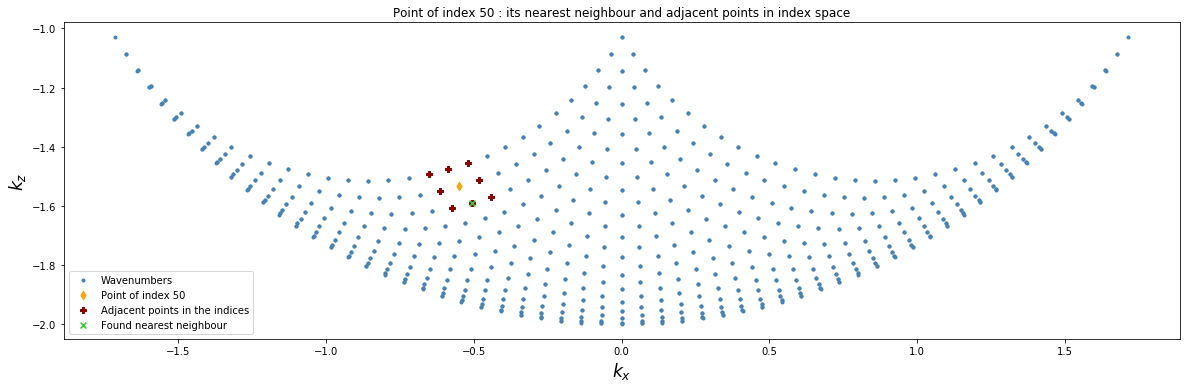

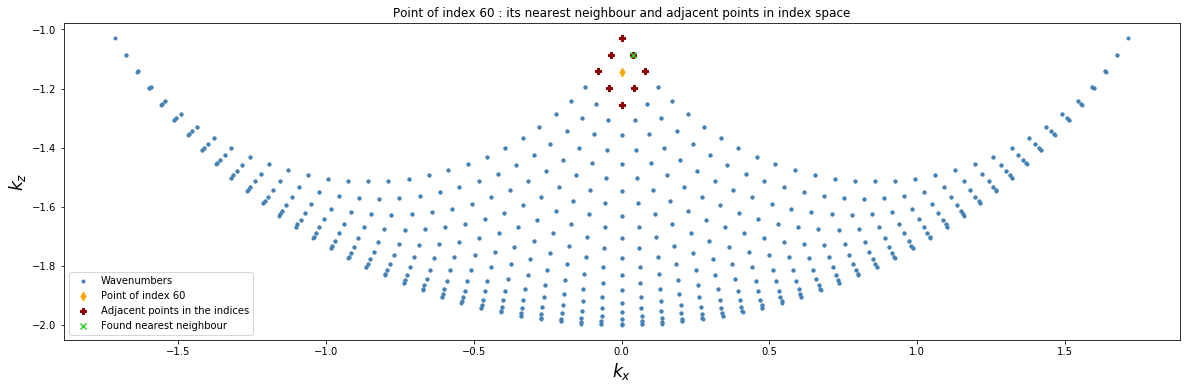

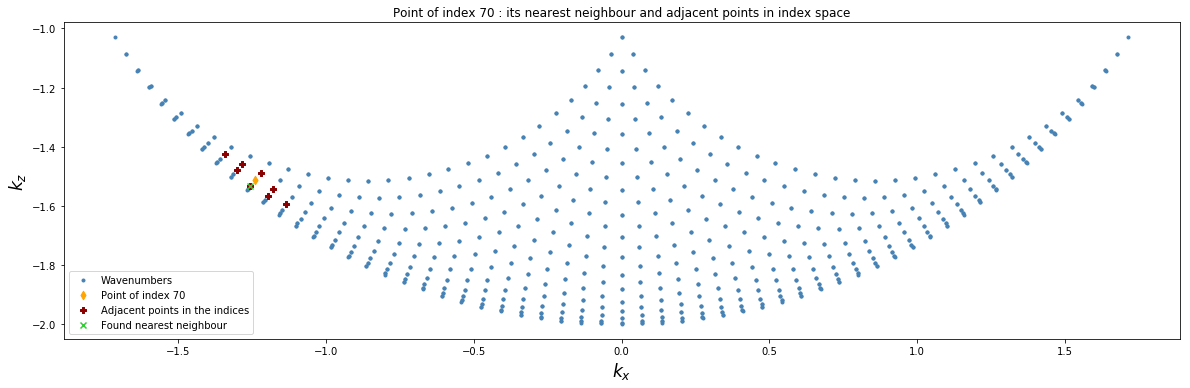

In [10]:
# Argument
i = 40
plot_nearest_neighbours_pt_in_cloud(K_regular, K_unique_regular, i, neighbours_full_regular, neighbours_indices_regular)

# Argument
i = 50
plot_nearest_neighbours_pt_in_cloud(K_regular, K_unique_regular, i, neighbours_full_regular, neighbours_indices_regular)

# Argument
i = 60
plot_nearest_neighbours_pt_in_cloud(K_regular, K_unique_regular, i, neighbours_full_regular, neighbours_indices_regular)

# Argument
i = 70
plot_nearest_neighbours_pt_in_cloud(K_regular, K_unique_regular, i, neighbours_full_regular, neighbours_indices_regular)

## 2.2 - Shifted sources and receivers (not at the same position)
We notice in the previous statistics that almost half of the points in the cloud are duplicates and this is due to the fact that for each source-receiver couple there is another source-receiver couple to which it is symmetric, because each source shares its position with a receiver; the idea is to shift the sources and receivers enough in opposite directions so that no source and receiver share the same position. As a consequence we double the density of the cloud of points and halfen the maximum distance to the nearest neighbour as can be seen herafter.

### Shifted reference cloud: regular positionning of the sources and receivers 

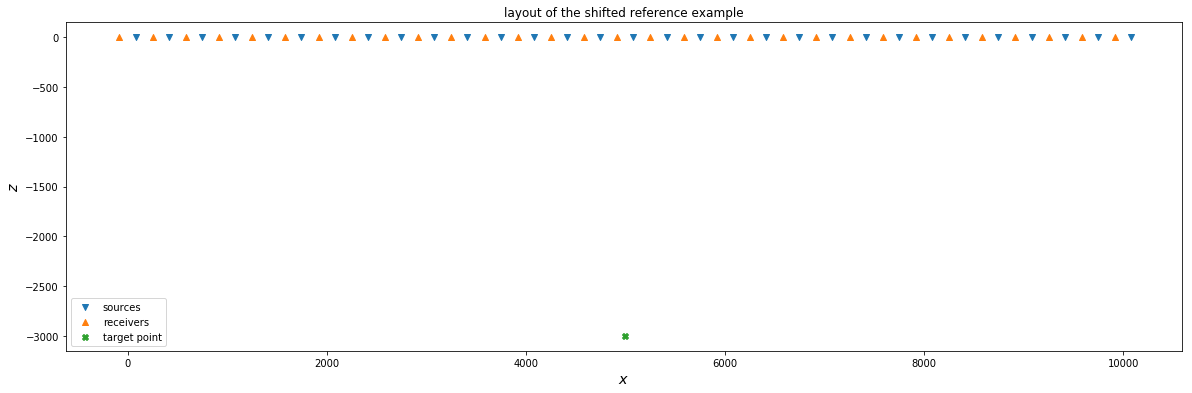

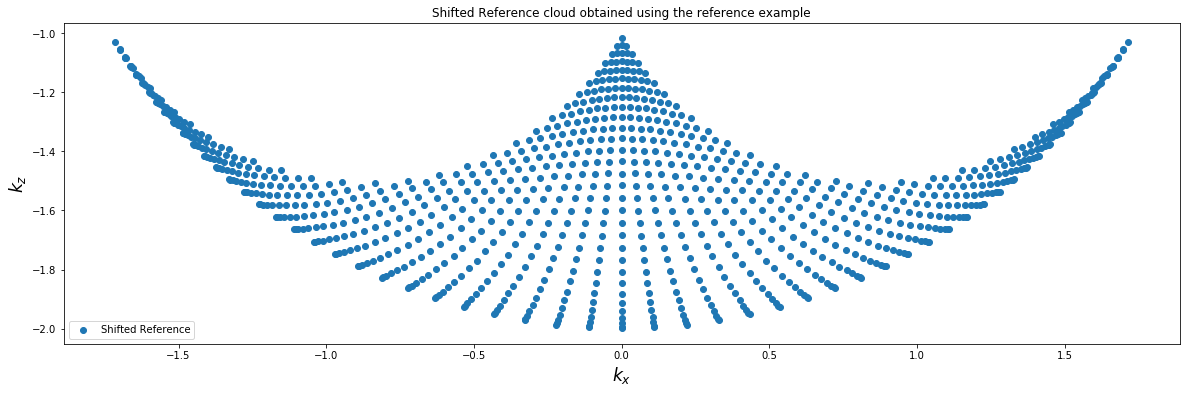

In [11]:
# reference sources and receivers
shift = np.abs( 0.25*(start - stop)/N )
S_ref_shifted = ( S_ref + np.array([shift, 0]) )  # localizations of the sources
R_ref_shifted = ( R_ref - np.array([shift, 0]) )  # localizations of the receivers

# We compute the wavenumbers components of reference
plot_acquisition_layout(S_ref_shifted, R_ref_shifted, x_diffraction_pt, title = "layout of the shifted reference example")
K_ref_shifted = wavenumbers_positions_formula(x_diffraction_pt, S_ref_shifted, R_ref_shifted, c0, f0)
plot_wavenumber_cloud(K_ref_shifted, "Shifted Reference", title = "Shifted Reference cloud obtained using the reference example", color = 'k')

Statistics about the distances:
----------------
Number of points with the duplicates:  961
Number of points after supression of the duplicates:  961
Minimum distance:  0.001560340102906525
Maximum distance:  0.044603241502578085
Mean distance:  0.025471752125983824
variance of the distances:  0.00016629899227095082
Maximum absolute value of the difference between the minimum distance found (distance to the nearest neighbour) and the minimum distance of the neighbouring points in indices:  0.103861
Number of values that are not null:  651


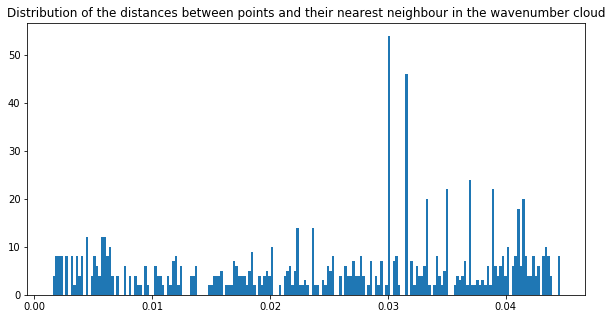

In [12]:
PhiS_ref_shifted, PhiR_ref_shifted = layout2angles(x_diffraction_pt, S_ref_shifted, R_ref_shifted)

K_unique_ref_shifted, distances_unique_ref_shifted, neighbours_unique_ref_shifted, distances_full_ref_shifted, neighbours_full_ref_shifted = find_nearest_neighbours(K_ref_shifted)
statistics_distances(K_ref_shifted, distances_unique_ref_shifted)
histogram_distances(K_ref_shifted, distances_unique_ref_shifted)
min_distances_formula_ref_shifted, min_distances_euclidean_ref_shifted, neighbours_indices_ref_shifted = min_indices_distance(PhiS_ref_shifted, PhiR_ref_shifted, c0, f0)

diff_array_ref_shifted = np.around(min_distances_formula_ref_shifted - distances_full_ref_shifted, decimals = 6)
print("Maximum absolute value of the difference between the minimum distance found (distance to the nearest neighbour) and the minimum distance of the neighbouring points in indices: ", np.amax( diff_array_ref_shifted ))

non_zero_ref_shifted = []
for value in diff_array_ref_shifted:
    if np.abs(value) != 0.:
        non_zero_ref_shifted.append(value)
print("Number of values that are not null: ", len(non_zero_ref_shifted))

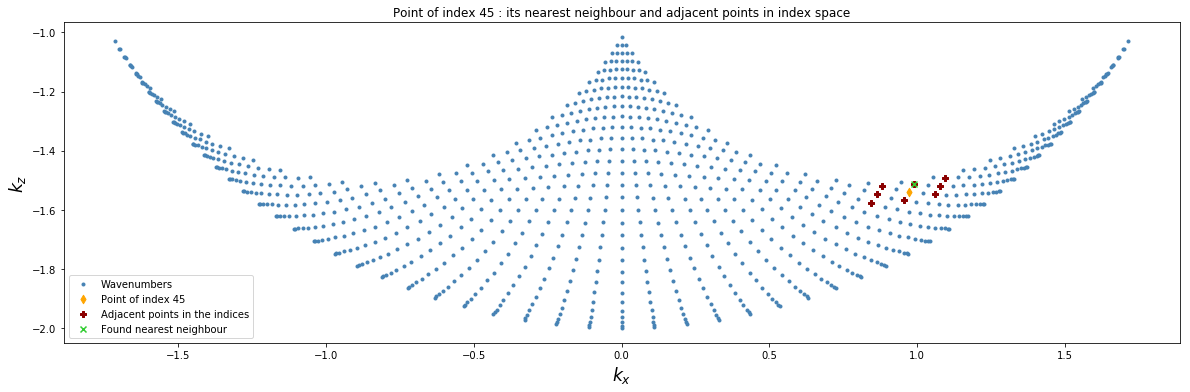

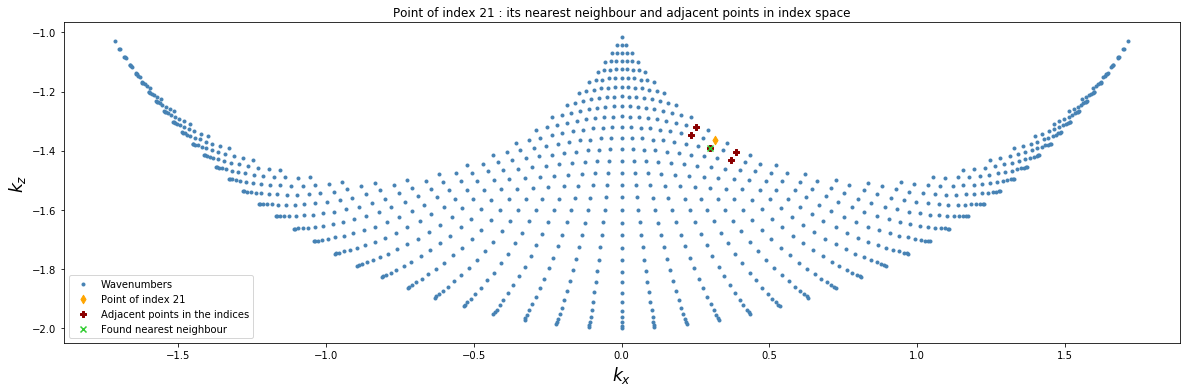

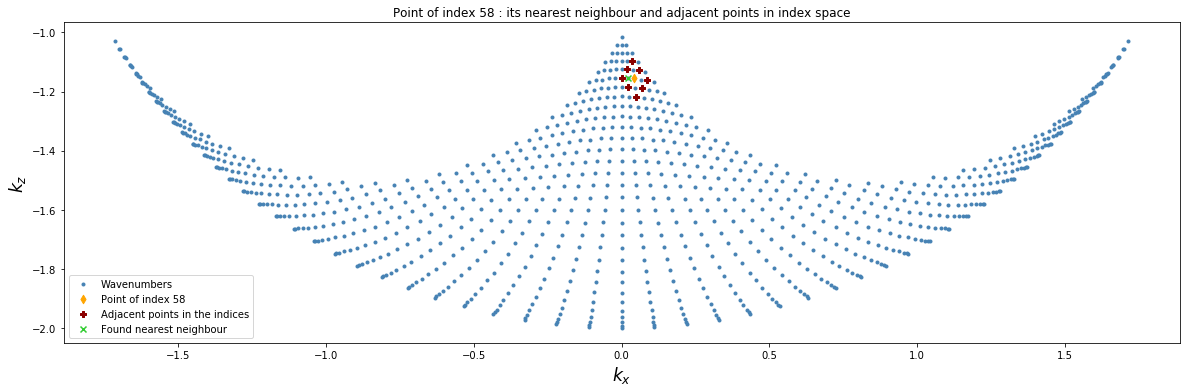

In [13]:
i = 45
plot_nearest_neighbours_pt_in_cloud(K_ref_shifted, K_unique_ref_shifted, i, neighbours_full_ref_shifted, neighbours_indices_ref_shifted)
i = 95
#plot_nearest_neighbours_pt_in_cloud(K_ref_shifted, K_ref_shifted_unique, i, neighbours_full_ref_shifted, neighbours_indices_ref_shifted)
i = 21
plot_nearest_neighbours_pt_in_cloud(K_ref_shifted, K_unique_ref_shifted, i, neighbours_full_ref_shifted, neighbours_indices_ref_shifted)
i = 58
plot_nearest_neighbours_pt_in_cloud(K_ref_shifted, K_unique_ref_shifted, i, neighbours_full_ref_shifted, neighbours_indices_ref_shifted)

### Shifted regular $\phi_s$ and $\phi_r$ angles

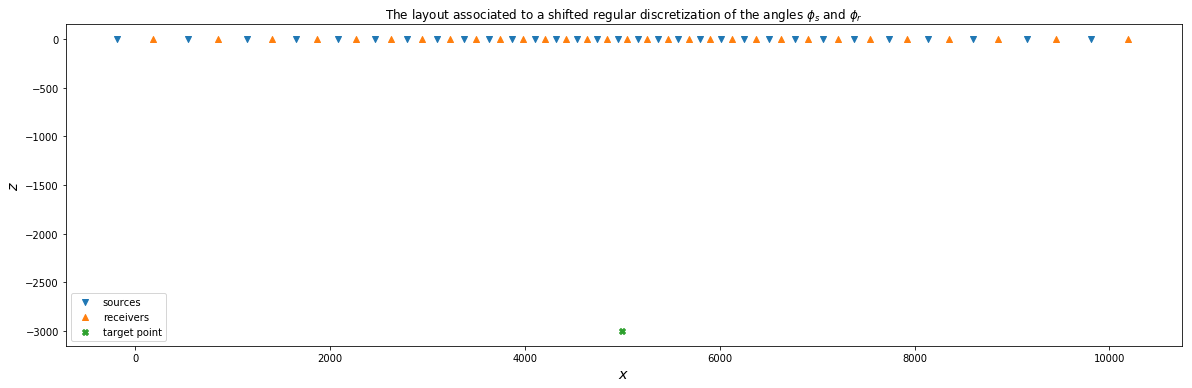

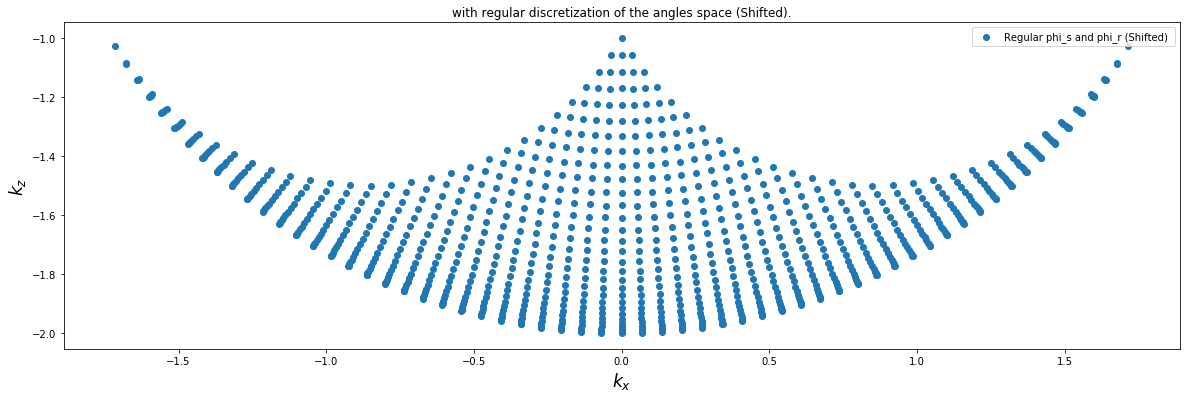

In [14]:
# A regular discretization of the angle \phi_s and \phi_r
shift = 0.5*phi_max/N
PhiS_regular_shifted = np.linspace(start = -phi_max, stop = phi_max, num = N) + shift
PhiR_regular_shifted = np.linspace(start = -phi_max, stop = phi_max, num = N) - shift

S_regular_shifted, R_regular_shifted = angles2layout(PhiS_regular_shifted, PhiR_regular_shifted, x_diffraction_pt)

plot_acquisition_layout(S_regular_shifted, R_regular_shifted, x_diffraction_pt, title = "The layout associated to a shifted regular discretization of the angles $\phi_s$ and $\phi_r$")

# We compute the wavenumbers components of reference
K_regular_shifted = wavenumbers_positions_formula(x_diffraction_pt, S_regular_shifted, R_regular_shifted, c0, f0)
plot_wavenumber_cloud(K_regular_shifted, "Regular phi_s and phi_r (Shifted) ", title = "with regular discretization of the angles space (Shifted).", color = 'steelblue')

Statistics about the distances:
----------------
Number of points with the duplicates:  961
Number of points after supression of the duplicates:  961
Minimum distance:  0.002282621126160744
Maximum distance:  0.06867828396280075
Mean distance:  0.02161573123354947
variance of the distances:  0.00020630752899171719
Maximum absolute value of the difference between the minimum distance found (distance to the nearest neighbour) and the minimum distance of the neighbouring points in indices:  0.066244
Number of values that are not null:  843


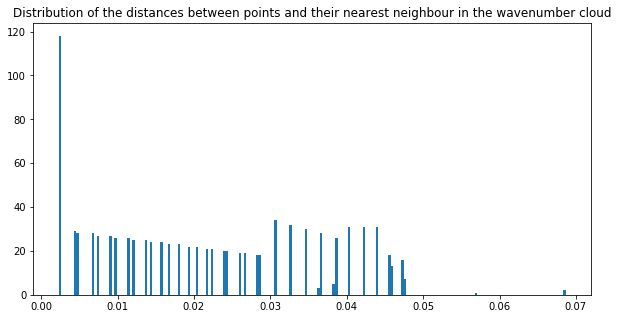

In [15]:
PhiS_regular_shifted, PhiR_regular_shifted = layout2angles(x_diffraction_pt, S_regular_shifted, R_regular_shifted)

K_unique_regular_shifted, distances_unique_regular_shifted, neighbours_unique_regular_shifted, distances_full_regular_shifted, neighbours_full_regular_shifted = find_nearest_neighbours(K_regular_shifted)
statistics_distances(K_regular_shifted, distances_unique_regular_shifted)
histogram_distances(K_regular_shifted, distances_unique_regular_shifted)
min_distances_formula_regular_shifted, min_distances_euclidean_regular_shifted, neighbours_indices_regular_shifted = min_indices_distance(PhiS_regular_shifted, PhiR_regular_shifted, c0, f0)

diff_array_regular_shifted = np.around(min_distances_formula_regular_shifted - distances_full_regular_shifted, decimals = 6)
print("Maximum absolute value of the difference between the minimum distance found (distance to the nearest neighbour) and the minimum distance of the neighbouring points in indices: ", np.amax( diff_array_regular_shifted ))

non_zero_regular_shifted = []
for value in diff_array_regular_shifted:
    if np.abs(value) != 0.:
        non_zero_regular_shifted.append(value)
print("Number of values that are not null: ", len(non_zero_regular_shifted))

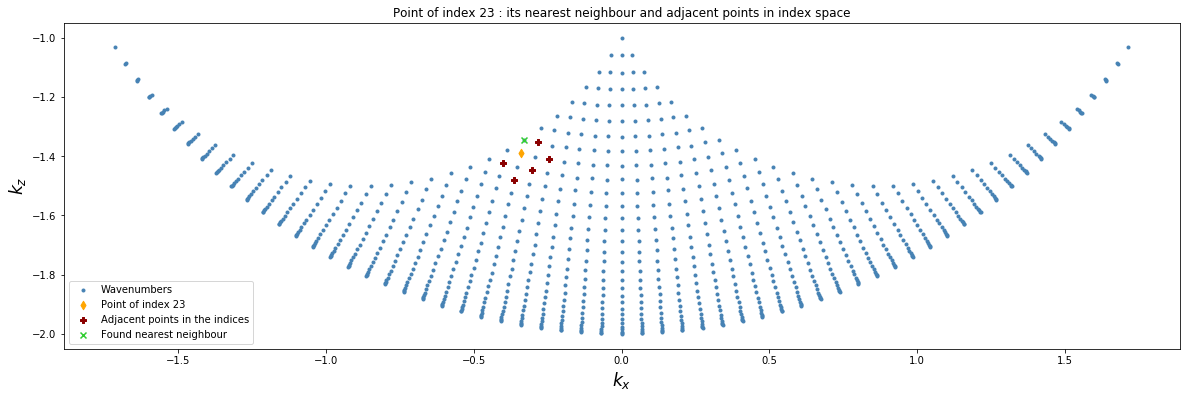

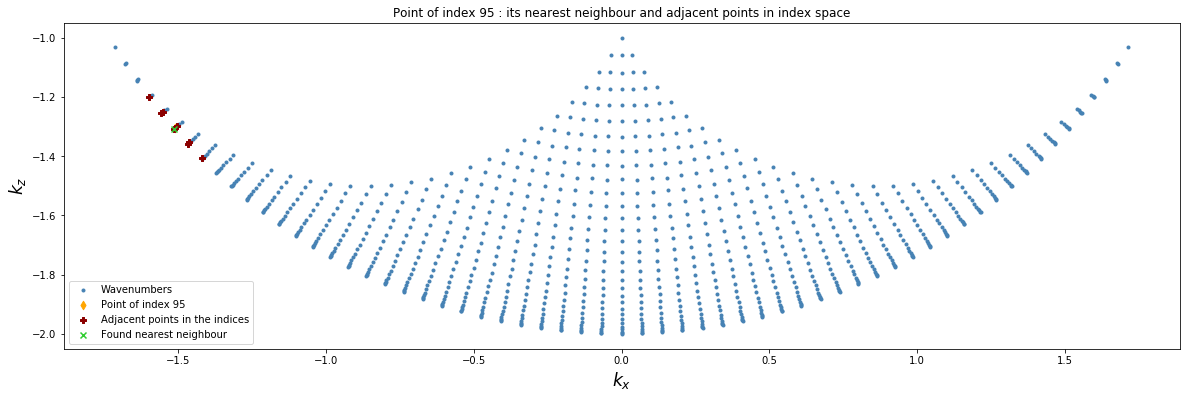

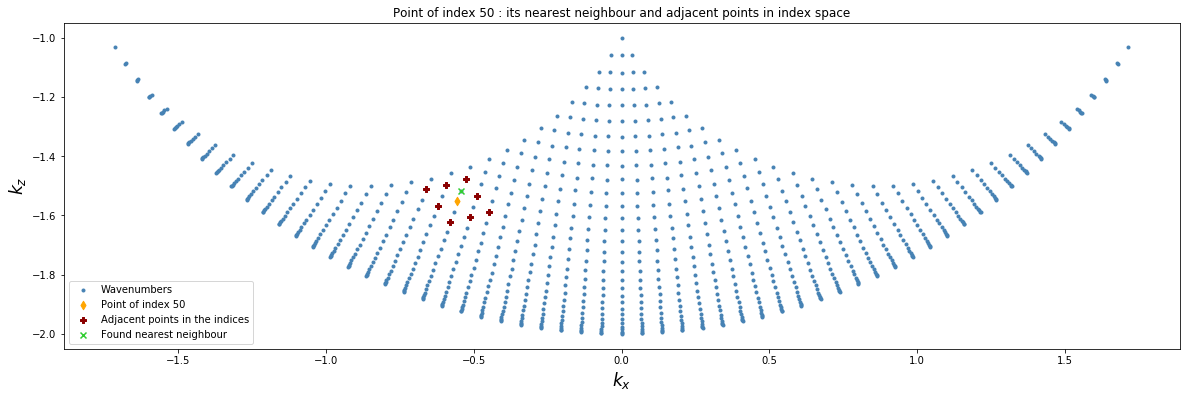

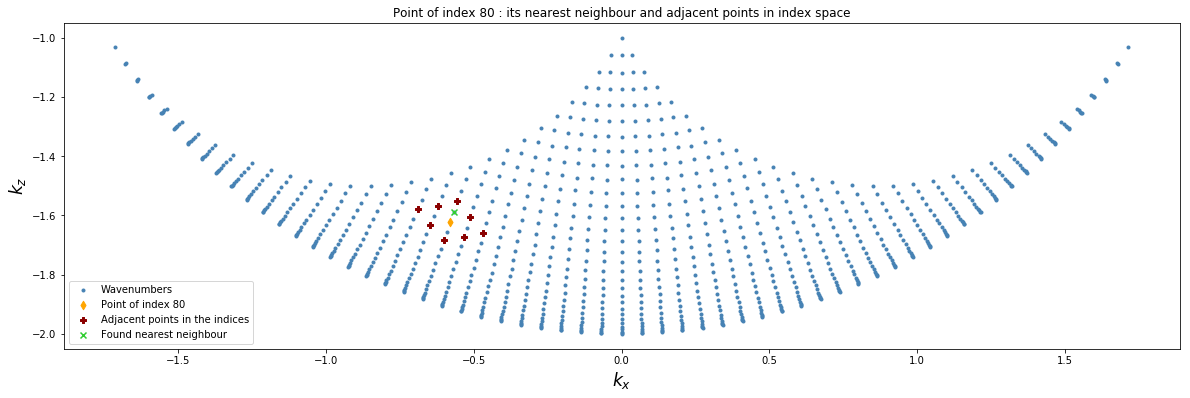

In [16]:
i = 23
plot_nearest_neighbours_pt_in_cloud(K_regular_shifted, K_unique_regular_shifted, i, neighbours_full_regular_shifted, neighbours_indices_regular_shifted)
i = 95
plot_nearest_neighbours_pt_in_cloud(K_regular_shifted, K_unique_regular_shifted, i, neighbours_full_regular_shifted, neighbours_indices_regular_shifted)
i = 50
plot_nearest_neighbours_pt_in_cloud(K_regular_shifted, K_unique_regular_shifted, i, neighbours_full_regular_shifted, neighbours_indices_regular_shifted)
i = 80
plot_nearest_neighbours_pt_in_cloud(K_regular_shifted, K_unique_regular_shifted, i, neighbours_full_regular_shifted, neighbours_indices_regular_shifted)

## Comparison of the histograms

Text(0.5, 1.0, 'shifted regular')

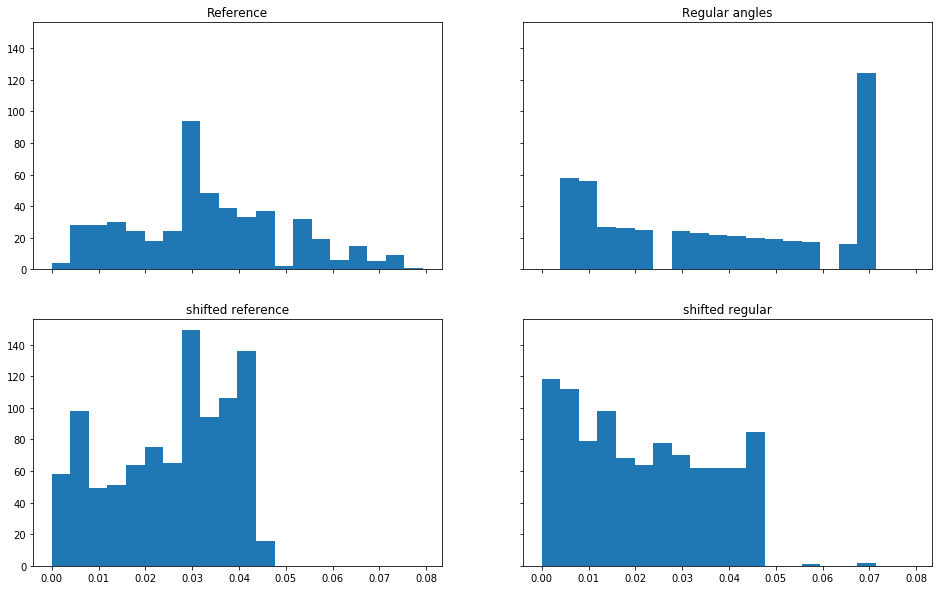

In [17]:
# We find the largest distance to set a common upper bound for the range to our histograms
A = np.concatenate([distances_unique_ref, distances_unique_regular, distances_unique_ref_shifted, distances_unique_regular_shifted])
upper_bound = np.amax(A)
nb_bins = 20 

fig, ax = plt.subplots(2,2, figsize = (1.61*10, 10), sharex = 'all', sharey = "all")
ax[0,0].hist(distances_unique_ref, range = (0, upper_bound), bins = nb_bins)
ax[0,0].set_title("Reference")

ax[0,1].hist(distances_unique_regular, range = (0, upper_bound), bins = nb_bins)
ax[0,1].set_title("Regular angles")

ax[1,0].hist(distances_unique_ref_shifted, range = (0, upper_bound), bins = nb_bins)
ax[1,0].set_title("shifted reference")

ax[1,1].hist(distances_unique_regular_shifted, range = (0, upper_bound), bins = nb_bins)
ax[1,1].set_title("shifted regular")

#plt.title("Distribution of the distances between points and their nearest neighbour in the wavenumber cloud")